<a href="https://colab.research.google.com/github/rkspatel08/General_Notes/blob/main/PSL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PSL - Assignment 1 Submission**

Author  : Rakesh Patel (rp22)

Program : MCS-DS

**Part 1: Generate Data**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
np.random.seed(3578);     # setting seed to last 4 of UIN

Generate the 20 centers, 10 for each group.

In [4]:
csize = 10
p = 2
s = 1;      # sd for generating the centers within each class
m1 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[1, 0]] * csize)])
m0 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[0, 1]] * csize)])

Generate a Training Sample of size 200 (100 from each class)

In [5]:
n = 100
# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.randint(csize, size = n)
id0 = np.random.randint(csize, size = n)

# sd for generating data
s = np.sqrt(float(1)/5)

traindata = np.random.normal(size = (2 * n, p)) * s \
            + np.concatenate([m1[id1,:], m0[id0,:]])
traindata_y = np.concatenate(([1]*n, [0]*n))


Generate Test Sample of size 10,000 (5,000 from each class).

In [6]:
n_test = 5000
# Randomly allocate the n samples for class 1  to the 10 clusters
id1_test = np.random.randint(csize, size = n_test)
id0_test = np.random.randint(csize, size = n_test)

# sd for generating data
s = np.sqrt(float(1)/5)

testdata = np.random.normal(size = (2 * n_test, p)) * s \
            + np.concatenate([m1[id1_test,:], m0[id0_test,:]])
testdata_y = np.concatenate(([1]*n_test, [0]*n_test))


Scatter plot of the training data

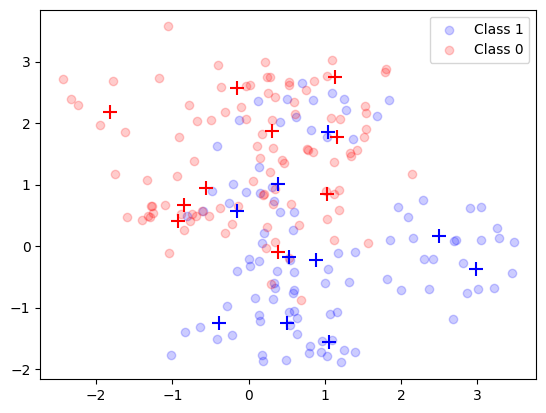

In [7]:
#plotting training data with two classes
plt.scatter(traindata[:n, 0], traindata[:n, 1], c = "blue", alpha=0.2, label='Class 1')
plt.scatter(traindata[n:, 0], traindata[n:, 1], c = "red", alpha=0.2, label='Class 0')

#plotting centers
plt.scatter(m1[:,0], m1[:,1], marker = '+', s = 100, c = "blue")
plt.scatter(m0[:,0], m0[:,1], marker = '+', s = 100, c = "red")

plt.legend()
plt.show()

In [8]:
def knn_prediction(X_train, y_train, X_test, k):

  # initialize distance matrix
  num_test = X_test.shape[0]
  num_train = X_train.shape[0]
  dist = np.zeros((num_test, num_train))

  # calculate distance between two points
  x_squared = np.sum(X_test ** 2, axis=1)  # square of elements along rows
  term_2 = -2 * np.matmul(X_test, X_train.T)  # -2*X*Y
  y_squared = np.sum(X_train ** 2, axis=1)  # square of elements along rows
  dist = np.sqrt(x_squared.reshape(-1, 1) + term_2 + y_squared)

  # Get the k nearest samples based on the euclidean distance
  k_indices = np.argsort(dist)[:,:k]

  # Initialize an array to hold the most common labels for each query point
  most_common_labels = np.zeros(k_indices.shape[0], dtype=int)

  # get k nearest labels based on nearest distance
  k_nearest_labels = [y_train[i] for i in k_indices]

  for i, labels in enumerate(k_nearest_labels):
    # Find the most common label among the nearest neighbors
    most_common = Counter(labels).most_common(1)
    most_common_labels[i] = most_common[0][0]

  return most_common_labels

In [9]:

def knn_prediction_with_tie_breaker(X_train, y_train, X_test, k):
    # Initialize distance matrix
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dist = np.zeros((num_test, num_train))

    # Calculate distance between two points
    x_squared = np.sum(X_test ** 2, axis=1).reshape(-1, 1)
    term_2 = -2 * np.matmul(X_test, X_train.T)
    y_squared = np.sum(X_train ** 2, axis=1)
    dist = np.sqrt(x_squared + term_2 + y_squared)

    # Get the k nearest samples based on the Euclidean distance
    k_indices = np.argsort(dist, axis=1)[:, :k]

    # Initialize an array to hold the most common labels for each query point
    most_common_labels = np.zeros(num_test, dtype=int)

    def weighted_vote(distances, labels):
        # Avoid division by zero
        weights = 1 / (distances + 1e-5)
        label_weights = {}
        for label, weight in zip(labels, weights):
            if label not in label_weights:
                label_weights[label] = 0
            label_weights[label] += weight
        # Return the label with the highest weight
        most_common_label = max(label_weights, key=label_weights.get)
        return most_common_label

    # Process each query point
    for i in range(num_test):
        distances = dist[i, k_indices[i]]
        labels = y_train[k_indices[i]]
        most_common_labels[i] = weighted_vote(distances, labels)

    return most_common_labels


In [10]:
# invoke knn prediction function

# Example dataset (2D points)
X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 5], [6, 6], [7, 7]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Test samples
X_test = np.array([[5, 5], [7, 7]])

k=3
#knn_prediction(X_train, y_train, X_test, k)
#predictions = knn_prediction(traindata, ytrain, testdata, k)
#knn_prediction_with_tie_breaker(X_train, y_train, X_test, k)
predictions_k1 = knn_prediction_with_tie_breaker(traindata, traindata_y, testdata, 1)
predictions_k3 = knn_prediction_with_tie_breaker(traindata, traindata_y, testdata, 3)
predictions_k5 = knn_prediction_with_tie_breaker(traindata, traindata_y, testdata, 5)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(traindata, traindata_y)

# Predict on the test set
prediction_skl_k1 = knn.predict(testdata)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(traindata, traindata_y)

# Predict on the test set
prediction_skl_k3 = knn.predict(testdata)


k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(traindata, traindata_y)

# Predict on the test set
prediction_skl_k5 = knn.predict(testdata)


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the confusion matrix and convert into dataframe
cm_scratch_k1 = confusion_matrix(testdata_y, predictions_k1)
cm_df_scratch_k1 = pd.DataFrame(cm_scratch_k1)

cm_scratch_k3 = confusion_matrix(testdata_y, predictions_k3)
cm_df_scratch_k3 = pd.DataFrame(cm_scratch_k3)

cm_scratch_k5 = confusion_matrix(testdata_y, predictions_k5)
cm_df_scratch_k5 = pd.DataFrame(cm_scratch_k5)

# Print the labeled confusion matrix as a table
print("Confusion Matrix with Labels:")
print("------------------------------")
print("Results from KNN built from scratch for K=1")
print(cm_df_scratch_k1)
print("------------------------------")
print("Results from KNN built from scratch for K=3")
print(cm_df_scratch_k3)
print("------------------------------")

print("Results from KNN built from scratch for K=5")
print(cm_df_scratch_k5)
print("------------------------------")


# Create the confusion matrix and convert into dataframe
cm_sklearn_k1 = confusion_matrix(testdata_y, prediction_skl_k1)
cm_df_sklearn_k1 = pd.DataFrame(cm_sklearn_k1)

cm_sklearn_k3 = confusion_matrix(testdata_y, prediction_skl_k3)
cm_df_sklearn_k3 = pd.DataFrame(cm_sklearn_k3)

cm_sklearn_k3 = confusion_matrix(testdata_y, prediction_skl_k5)
cm_df_sklearn_k5 = pd.DataFrame(cm_sklearn_k3)

# Print the labeled confusion matrix as a table
print("------------------------------")
print("------------------------------")
print("Results from KNN using KNeighborsClassifier for K=1")
print(cm_df_sklearn_k1)
print("------------------------------")
print("Results from KNN using KNeighborsClassifier for K=3")
print(cm_df_sklearn_k3)
print("------------------------------")

print("Results from KNN using KNeighborsClassifier for K=5")
print(cm_df_sklearn_k5)
print("------------------------------")



Confusion Matrix with Labels:
------------------------------
Results from KNN built from scratch for K=1
      0     1
0  3733  1267
1  1454  3546
------------------------------
Results from KNN built from scratch for K=3
      0     1
0  3857  1143
1  1416  3584
------------------------------
Results from KNN built from scratch for K=5
      0     1
0  3929  1071
1  1440  3560
------------------------------
------------------------------
------------------------------
Results from KNN using KNeighborsClassifier for K=1
      0     1
0  3733  1267
1  1454  3546
------------------------------
Results from KNN using KNeighborsClassifier for K=3
      0     1
0  3923  1077
1  1366  3634
------------------------------
Results from KNN using KNeighborsClassifier for K=5
      0     1
0  3998  1002
1  1428  3572
------------------------------


In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset with 200 samples and 5 features
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize cross-validation parameters
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# Step 4: Iterate over different values of k (from 1 to 180)
k_range = range(1, 181)
cv_scores = []

for k in k_range:
    fold_accuracies = []

    # Step 5: Cross-validation loop
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Step 6: Train KNN model for the current fold and k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)

        # Step 7: Evaluate on the validation fold
        y_val_pred = knn.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        fold_accuracies.append(accuracy)

    # Step 8: Calculate average accuracy for the current k
    avg_accuracy = np.mean(fold_accuracies)
    cv_scores.append(avg_accuracy)

# Step 9: Identify the best k
best_k = np.argmax(cv_scores) + 1  # Adding 1 because index 0 corresponds to k=1
best_cv_score = cv_scores[best_k - 1]

print(f"Best k: {best_k}")
print(f"Best cross-validated accuracy: {best_cv_score:.2f}")

# Step 10: Train the final KNN model using the best k on the full training data
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Step 11: Predict on the test set and evaluate the final model
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test set accuracy with k={best_k}: {test_accuracy:.2f}")


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 144, n_neighbors = 145

In [14]:
def cvKNN_accuracy(X, y, k, num_folds=10):
    # ideally training data should be shuffled on indices; however since we have randomly created training data; we can skip shuffling altogether
    np.random.seed(42)  # Set a random seed for reproducibility
    indices = np.random.permutation(X.shape[0])  # Get a shuffled index array
    X, y = X[indices], y[indices]  # Shuffle X and y based on the shuffled indices

    fold_size = len(X) // num_folds  # Calculate fold size
    k_error = []
    accuracy = []
    for i in range(num_folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i != num_folds - 1 else len(X)

        # Create validation fold
        X_val = X[start:end]
        y_val = y[start:end]

        # Create training folds by excluding the validation fold
        X_train_fold = np.concatenate([X[:start], X[end:]], axis=0)
        y_train_fold = np.concatenate([y[:start], y[end:]], axis=0)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)

        # Step 7: Predict and evaluate on the validation fold
        y_val_pred = knn.predict(X_val)
        accuracy.append(np.sum(y_val == y_val_pred) / len(y_val))
        error =  1 - np.sum(y_val == y_val_pred) / len(y_val)
        k_error.append(error)

    # Step 8: Calculate average accuracy for the current k
    avg_error = np.mean(k_error)
    return avg_error, np.mean(accuracy)


def cvKNN_implementations(traindata,traindata_y):
  k_range = range(1, 181)
  all_errors = []
  accuracy_list = []
  for k in k_range:
    k_error, accuracy = cvKNN_accuracy(traindata, traindata_y, k)
    all_errors.append(k_error)
    accuracy_list.append(accuracy)

  minimum_error = min(all_errors)
  minimum_error_index = all_errors.index(minimum_error)
  best_k = k_range[minimum_error_index]
  k_with_min_error = [k_range[i] for i, error in enumerate(all_errors) if error == minimum_error]
  final_k = max(k_with_min_error)
  return final_k


In [15]:
optimized_k = cvKNN_implementations(traindata, traindata_y)
print(optimized_k)

19


In [16]:
final_knn = KNeighborsClassifier(n_neighbors=optimized_k)
final_knn.fit(traindata, traindata_y)

# Predict on the test set
final_prediction = final_knn.predict(testdata)

#results as confusion matrix
matrix_confusion = confusion_matrix(testdata_y, final_prediction)
cvv_df_conf_matrix = pd.DataFrame(matrix_confusion)
print("Confusion Matrix:")
print(cvv_df_conf_matrix)
print(matrix_confusion)

Confusion Matrix:
      0     1
0  4514   486
1  1645  3355
[[4514  486]
 [1645 3355]]


In [17]:
train_err_cvknn = 1 - final_knn.score(traindata, traindata_y)
test_err_cvknn = 1- final_knn.score(testdata, testdata_y)
print(train_err_cvknn)
print(test_err_cvknn)

0.18000000000000005
0.21309999999999996


In [65]:
def bayes_theorem_classifier(test_data, m0, m1, s):
  #print(test_data[1:5,:])

  distance_0 = np.sum((test_data[:, np.newaxis, :] - m0) ** 2, axis=2)
  distance_1 = np.sum((test_data[:, np.newaxis, :] - m1) ** 2, axis=2)

  exponent_0 = -distance_0 / (2 * (s ** 2))
  exponent_1 = -distance_1 / (2 * (s ** 2))

  likelihood_0 = np.sum(np.exp(exponent_0), axis=1)
  likelihood_1 = np.sum(np.exp(exponent_1), axis=1)

  ratio = likelihood_1 / likelihood_0
  predictions = (ratio >= 1).astype(int)

  return predictions

predictions = bayes_theorem_classifier(testdata, m0, m1, s)
conf_matrix_bayes = confusion_matrix(testdata_y, predictions)
print(conf_matrix_bayes)

[[4164  836]
 [1054 3946]]


In [66]:
simulations = 50
k = 7

knn_errors, cvKNN_errors, bayes_errors, k_list = [], [], [], []
def generatedata_for_sims(m0, m1,sim):
  # generate training data
  n_train = 100
  id1_train = np.random.randint(csize, size = n_train)
  id0_train = np.random.randint(csize, size = n_train)
  s = np.sqrt(float(1)/sim)
  traindata_sims = np.random.normal(size = (2 * n_train, p)) * s + np.concatenate([m1[id1_train,:], m0[id0_train,:]])
  traindata_sims_y = np.concatenate(([1]*n_train, [0]*n_train))

  # generate test data
  n_test = 5000
  id1_test = np.random.randint(csize, size = n_test)
  id0_test = np.random.randint(csize, size = n_test)
  s = np.sqrt(float(1)/sim)
  testdata_sims = np.random.normal(size = (2 * n_test, p)) * s + np.concatenate([m1[id1_test,:], m0[id0_test,:]])
  testdata_sims_y = np.concatenate(([1]*n_test, [0]*n_test))
  #print(traindata_sims[1:5,:])
  #print(traindata_sims_y[1:5])
  #print(testdata_sims[1:5,:])
  #print(testdata_sims_y[1:5])

  return traindata_sims, traindata_sims_y, testdata_sims, testdata_sims_y,s


for i in range(simulations):
    x_train, y_train, x_test, y_test,std = generatedata_for_sims(m0, m1,i+1)

    #tain knn on given k and keep track of error
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_knn_pred = knn.predict(x_test)
    error =  1 - np.sum(y_test == y_knn_pred) / len(y_test)
    knn_errors.append(error)

    #find optimized k using cv_knn implementation
    k_for_sim = cvKNN_implementations(x_train, y_train)
    k_list.append(k_for_sim)

    #train cvKNN on given k and keep track of error
    cvKnn_for_sim = KNeighborsClassifier(n_neighbors=k_for_sim)
    cvKnn_for_sim.fit(x_train, y_train)
    y_cvknn_pred = cvKnn_for_sim.predict(x_test)
    error =  1 - np.sum(y_test == y_cvknn_pred) / len(y_test)
    cvKNN_errors.append(error)

    #classification based on bayes theorem
    #print("bayes theorem")
    #print(x_test[1:5,:])
    bayes_y = bayes_theorem_classifier(x_test, m0, m1, std)
    bayes_error =  1 - np.sum(y_test == bayes_y) / len(y_test)
    bayes_errors.append(bayes_error)


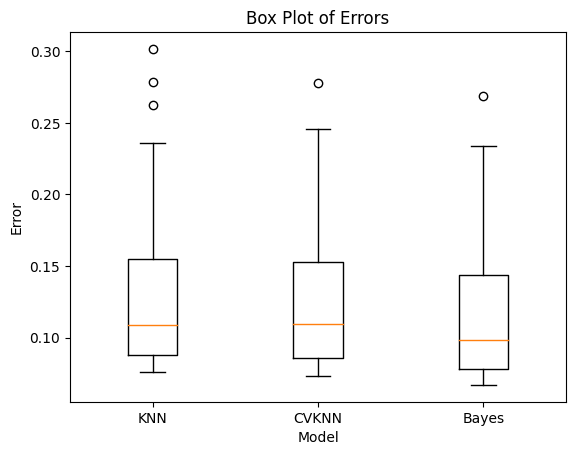

In [68]:
# plot the errors
plot_data = [knn_errors,cvKNN_errors, bayes_errors]
methods = ['KNN', 'CVKNN', 'Bayes']
plt.boxplot(plot_data)
plt.title('Box Plot of Errors')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(range(1, len(methods) + 1), methods)
plt.show()

In [59]:
print(bayes_errors)
print(cvKNN_errors)
print(knn_errors)

[0.19899999999999995, 0.19899999999999995, 0.19899999999999995, 0.19899999999999995, 0.19899999999999995]
[0.22660000000000002, 0.22950000000000004, 0.22060000000000002, 0.22240000000000004, 0.2228]
[0.29400000000000004, 0.27969999999999995, 0.24980000000000002, 0.22970000000000002, 0.22340000000000004]


In [52]:
print(bayes_y)
print(y_test)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [69]:
k_array = np.array(k_list)
print(f"min of k_array: {np.min(k_array)}")
print(f"max of k_array: {np.max(k_array)}")
print(f"median of k_array: {np.median(k_array)}")
print(f"25 percentile of k_array: {np.percentile(k_array,25)}")
print(f"75 percentile of k_array: {np.percentile(k_array,75)}")


min of k_array: 5
max of k_array: 170
median of k_array: 9.0
25 percentile of k_array: 7.0
75 percentile of k_array: 11.0
